In [2]:
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#input:
#folder_path: the path to your folder, put log files into this folder
#save2excel:True:save to excel file,False:don't save to excel file
#file_path: the path to output
#bit_flip:number of bits flip in log file
#output:
#data:object contains precision and layers
#prec:object contains precision(float)
#layer:object contains layers(string)
def auto_result(folder_path,save2excel,file_path,bit_flip):
  # Get a list of all files in the folder
  files = os.listdir(folder_path)
  files=sorted(files)
  print(files)
  #layers and precs from all files
  data=pd.DataFrame()
  prec=pd.DataFrame()
  layer=pd.DataFrame()
  # Iterate over files and read its contents
  for file in files:
    if (file.endswith('.log')):
        layer_list=list()
        #the prec before attack
        layer_list.append("empty")
        prec_list=list()
        print("read ",file)
        #open file and find all values
        with open(folder_path+"/"+file, 'r') as fl:
            log = fl.read()
            prec_values = re.findall(r"\*\*Test\*\* Prec@1 (\d+\.\d+)", log)
            bit_flip_layer=re.findall(r"max_loss_module = (.+) after",log)
        #   print("layer")
        #iterate and add values onto list
        for i, b in enumerate(bit_flip_layer, start=1):
            layer_list.append(b)
        for i, prec_data in enumerate(prec_values, start=1):
            #adjust the select area
            if(i<5)|(i>bit_flip+5):
                continue
            prec_list.append(prec_data)
        #only add completed results onto data, if the length result is less than 61, zero-pad to 61
        if(len(layer_list)<bit_flip+1)|(len(prec_list)<bit_flip+1):
            # print("original_pre",len(prec_list))
            # print("original_lay",len(layer_list))
            layer_list=layer_list+["none"]*(bit_flip+1-len(layer_list))
            prec_list=prec_list+['10.000']*(bit_flip+1-len(prec_list))
            # print("zeropad",prec_list)
            # print(len(layer_list))
            # print(len(prec_list))
        data[file+"/layer"]=layer_list
        data[file+"/prec"]=list(map(float, prec_list))
        prec[file]=list(map(float, prec_list))
        layer[file]=layer_list
    if(save2excel==True):
        # Save the DataFrame to a CSV file
        data.to_excel(file_path, index=False)
        print("EXCEL file saved successfully.")
  return data, prec,layer




['small_seed_1.log', 'small_seed_10.log', 'small_seed_11.log', 'small_seed_13.log', 'small_seed_16.log', 'small_seed_3.log', 'small_seed_32.log', 'small_seed_35.log', 'small_seed_42.log', 'small_seed_52.log', 'small_seed_65.log', 'small_seed_73.log', 'small_seed_76.log', 'small_seed_87.log', 'small_seed_91.log']
read  small_seed_1.log
EXCEL file saved successfully.
read  small_seed_10.log
EXCEL file saved successfully.
read  small_seed_11.log
EXCEL file saved successfully.
read  small_seed_13.log
EXCEL file saved successfully.
read  small_seed_16.log
EXCEL file saved successfully.
read  small_seed_3.log
EXCEL file saved successfully.
read  small_seed_32.log
EXCEL file saved successfully.
read  small_seed_35.log
EXCEL file saved successfully.
read  small_seed_42.log
EXCEL file saved successfully.
read  small_seed_52.log
EXCEL file saved successfully.
read  small_seed_65.log
EXCEL file saved successfully.
read  small_seed_73.log
EXCEL file saved successfully.
read  small_seed_76.log
EXCE

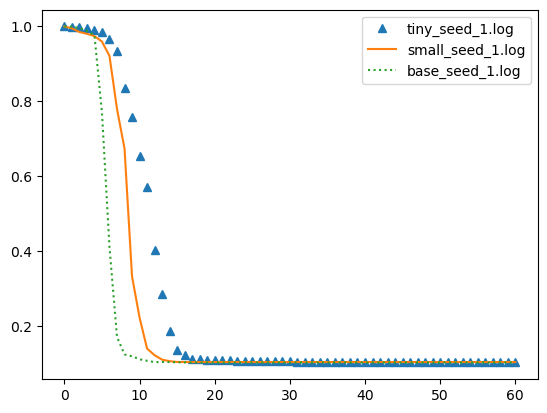

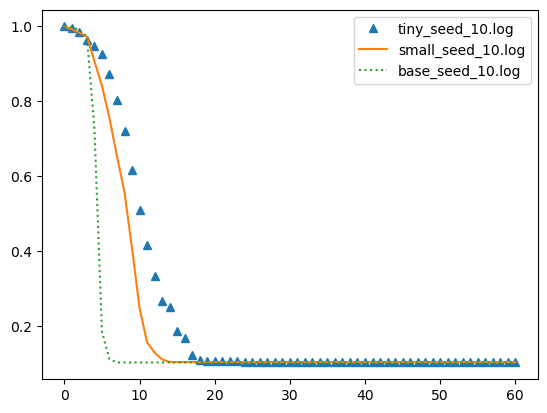

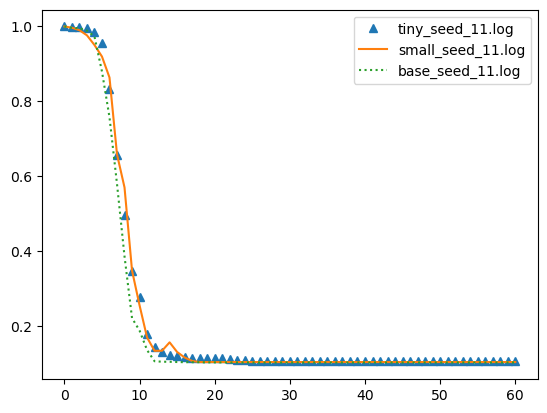

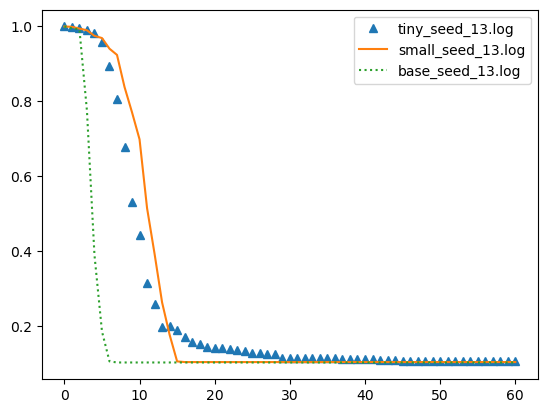

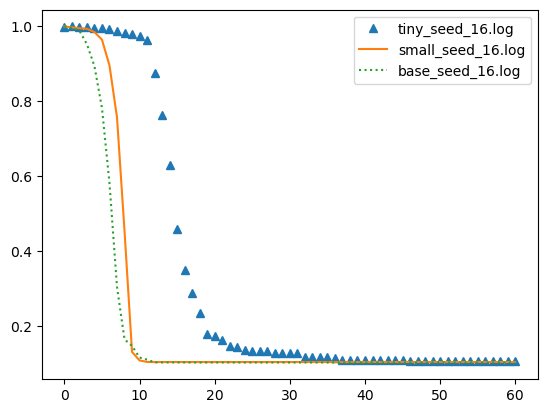

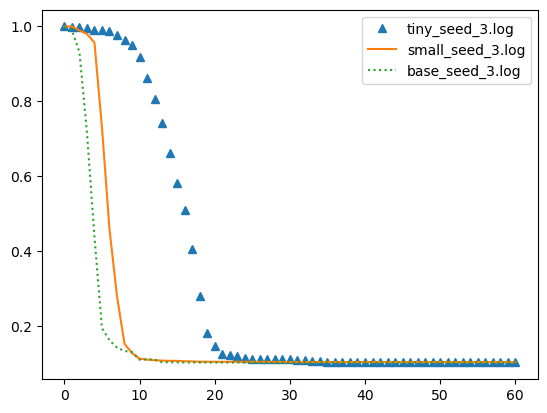

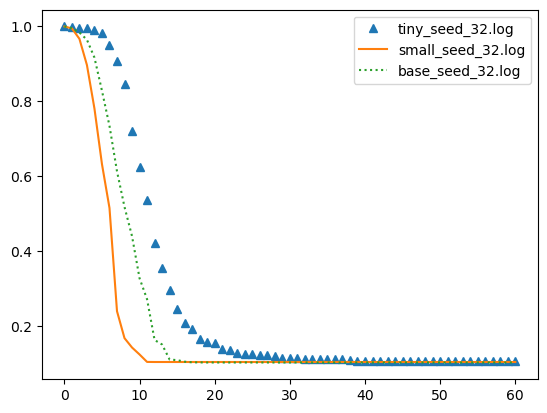

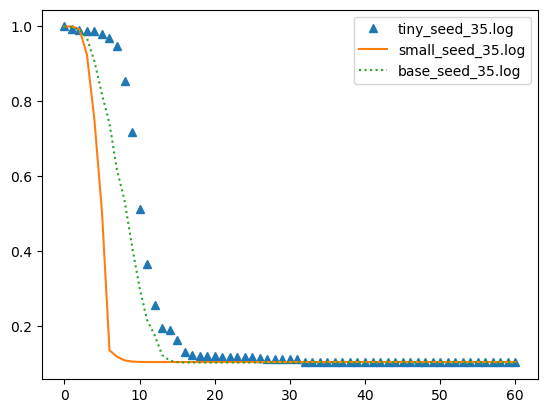

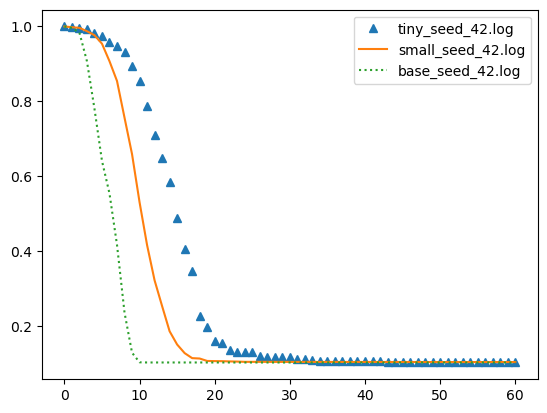

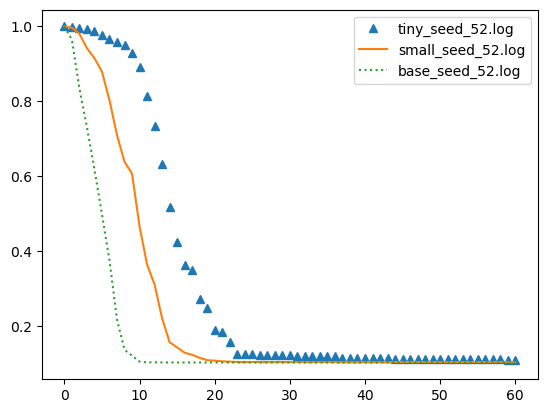

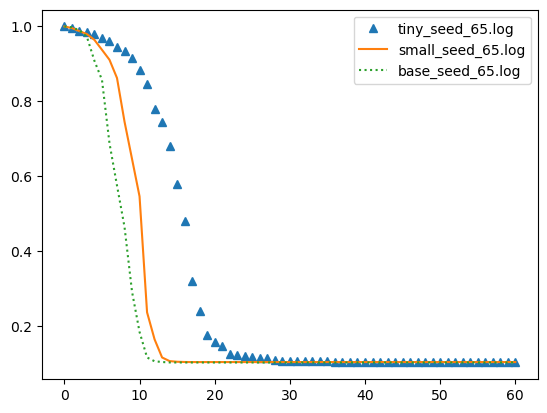

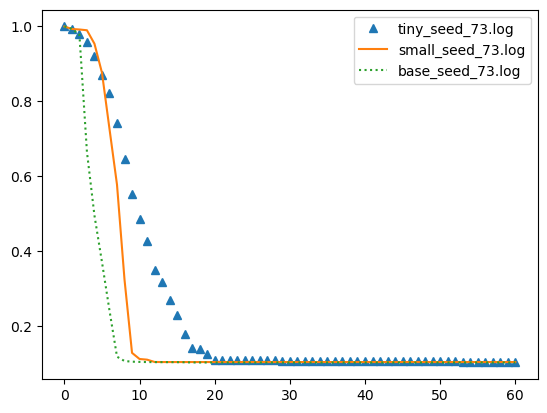

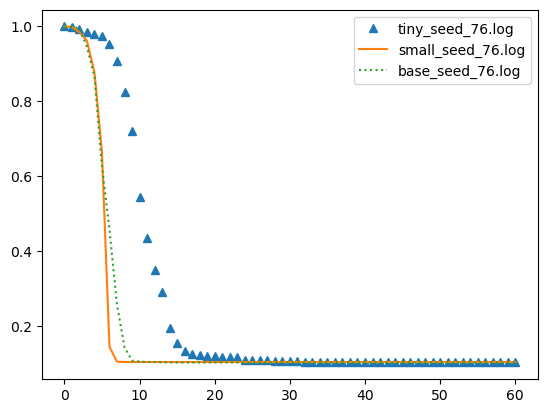

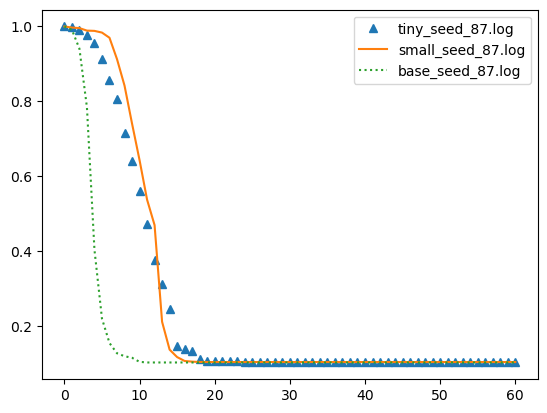

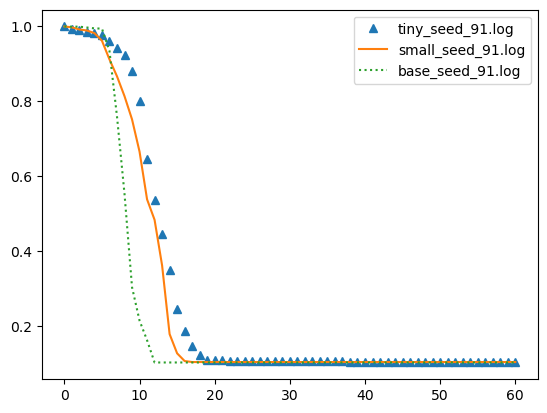

In [31]:
#data,prec,layer of small,tiny,base model
data_small=auto_result('small',True,"result_small.xlsx",60)[1]
data_tiny=auto_result('tiny',True,"result_tiny.xlsx",60)[1]
data_base=auto_result('base',True,"result_base.xlsx",60)[1]
data_tiny_distrib=auto_result("tiny",False,"result.xlsx",60)[1]
#fixed ramdon seed, plot accuracy of small, tiny, base model
#save figuers
for i in range(len(data_base.columns)):
    plt.plot(data_tiny.index, data_tiny[data_tiny.columns[i]]/max(data_tiny[data_tiny.columns[i]]),'^',label=data_tiny.columns[i])
    plt.plot(data_small.index,data_small[data_small.columns[i]]/max(data_small[data_small.columns[i]]),'-',label=data_small.columns[i])
    plt.plot(data_base.index,data_base[data_base.columns[i]]/max(data_base[data_base.columns[i]]),':',label=data_base.columns[i])
    plt.legend()
    #save images
    plt.savefig("figuers/"+(data_tiny.columns[i])[5:12]+".png")
    plt.show()
    

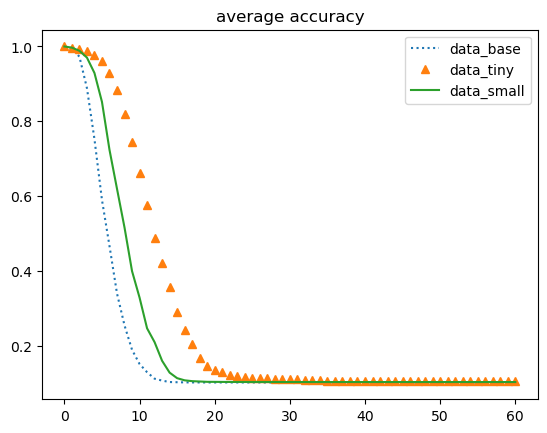

In [20]:
#take the average of accuracy
data_small_aver=np.average(data_small,axis=1)
data_tiny_aver=np.average(data_tiny,axis=1)
data_base_aver=np.average(data_base,axis=1)
plt.plot(data_base_aver/max(data_base_aver),':',label="data_base")
plt.plot(data_tiny_aver/max(data_tiny_aver),'^',label="data_tiny")
plt.plot(data_small_aver/max(data_small_aver),'-',label="data_small")
plt.title("average accuracy")
plt.legend()

['.DS_Store', 'top_01_persent.log', 'top_02_persent.log', 'top_03_persent.log', 'top_04_persent.log', 'top_05_persent.log', 'top_0_persent.log', 'top_10_persent.log', 'top_20_persent.log', 'top_30_persent.log']
read  top_01_persent.log
read  top_02_persent.log
read  top_03_persent.log
read  top_04_persent.log
read  top_05_persent.log
read  top_0_persent.log
read  top_10_persent.log
read  top_20_persent.log
read  top_30_persent.log
    top_01_persent.log  top_02_persent.log  top_03_persent.log  \
0                96.35               96.35               96.35   
1                96.23               96.27               96.28   
2                96.12               96.26               96.24   
3                95.98               96.19               96.15   
4                95.83               96.10               96.05   
..                 ...                 ...                 ...   
56               87.64               87.38               87.52   
57               87.62               

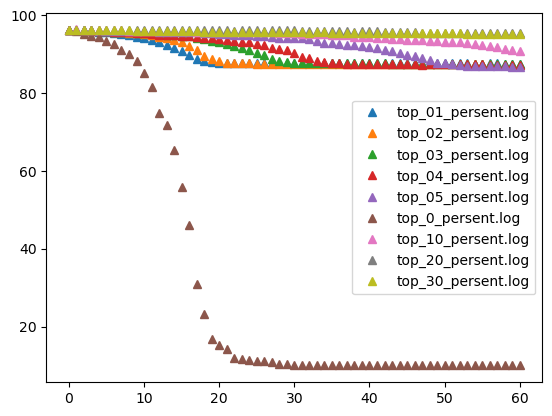

In [28]:
#protecting top 0,10,20,30% of weights, attack top 10 of the rest
top=auto_result('top',False,"result_top.xlsx",60)[1]
print(top)
for i in range(len(top.columns)):
    plt.plot(top.index, top[top.columns[i]],'^',label=top.columns[i])
    plt.legend()
plt.show()

['.DS_Store', 'top_0_persent.log', 'top_100_abs.log', 'top_10_abs.log', 'top_200_abs.log', 'top_300_abs.log', 'top_400_abs.log', 'top_500_abs.log']
read  top_0_persent.log
read  top_100_abs.log
read  top_10_abs.log
read  top_200_abs.log
read  top_300_abs.log
read  top_400_abs.log
read  top_500_abs.log
    top_0_persent.log  top_100_abs.log  top_10_abs.log  top_200_abs.log  \
0               96.35            96.35           96.35            96.35   
1               95.90            95.99           96.16            96.20   
2               95.22            95.68           95.30            96.19   
3               94.81            95.37           94.71            96.05   
4               94.34            95.26           93.89            95.91   
..                ...              ...             ...              ...   
56              10.00            12.30           10.17            28.04   
57              10.00            12.22           10.17            25.04   
58              10.00 

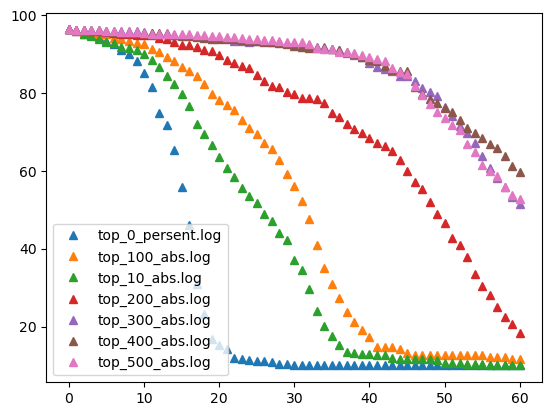

In [9]:
#protecting top 10,100,1000 of weights, attack top 10 of the rest
top_abs=auto_result('top_abs',False,"result_top_abs.xlsx",60)[1]
print(top_abs)
for i in range(len(top_abs.columns)):
    plt.plot(top_abs.index, top_abs[top_abs.columns[i]],'^',label=top_abs.columns[i])
    plt.legend()
plt.show()

['top_01_abs_original.log', 'top_03_abs_original.log', 'top_05_abs_original.log', 'top_0_abs_original.log', 'top_100_abs_original.log', 'top_10_abs_original.log']
read  top_01_abs_original.log
EXCEL file saved successfully.
read  top_03_abs_original.log
EXCEL file saved successfully.
read  top_05_abs_original.log
EXCEL file saved successfully.
read  top_0_abs_original.log
EXCEL file saved successfully.
read  top_100_abs_original.log
EXCEL file saved successfully.
read  top_10_abs_original.log
EXCEL file saved successfully.
    top_01_abs_original.log  top_03_abs_original.log  top_05_abs_original.log  \
0                     96.35                    96.35                    96.35   
1                     95.90                    95.52                    95.52   
2                     95.50                    95.50                    95.50   
3                     95.26                    95.34                    95.44   
4                     94.78                    95.35              

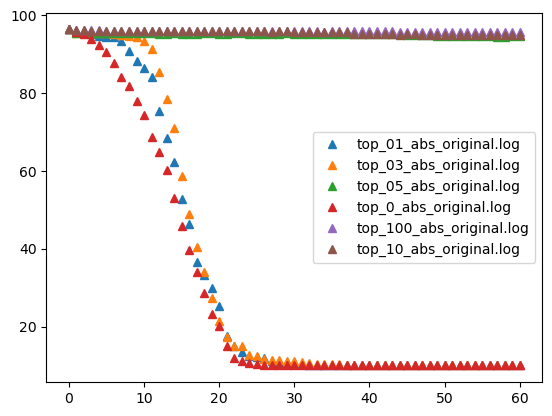

In [10]:
#protecting top 10,100,1000 of weights, attack top 10 of the rest
top_abs=auto_result('top_abs_original',True,"result_top_abs_original.xlsx",60)[1]
print(top_abs)
for i in range(len(top_abs.columns)):
    plt.plot(top_abs.index, top_abs[top_abs.columns[i]],'^',label=top_abs.columns[i])
    plt.legend()
plt.show()

[95.95, 96.22, 96.09, 95.98, 96.03, 96.3, 96.18, 96.23, 96.35, 96.08, 96.17, 96.07, 95.91]
variance 0.016861538461538286


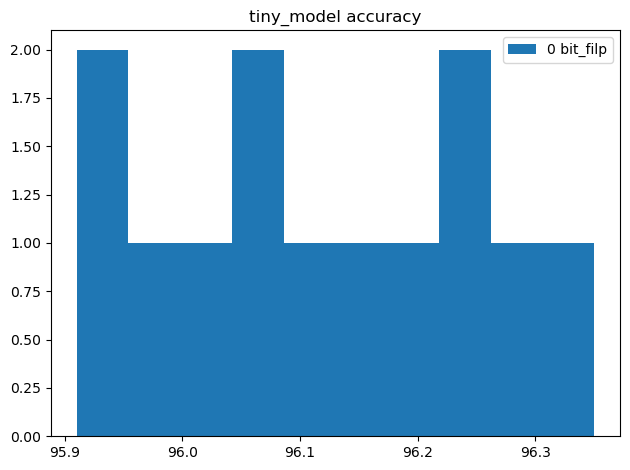

[95.89, 96.04, 95.92, 96.09, 95.96, 95.71, 96.01, 95.97, 95.9, 95.53, 95.95, 95.86, 95.39]
variance 0.038175147928994506


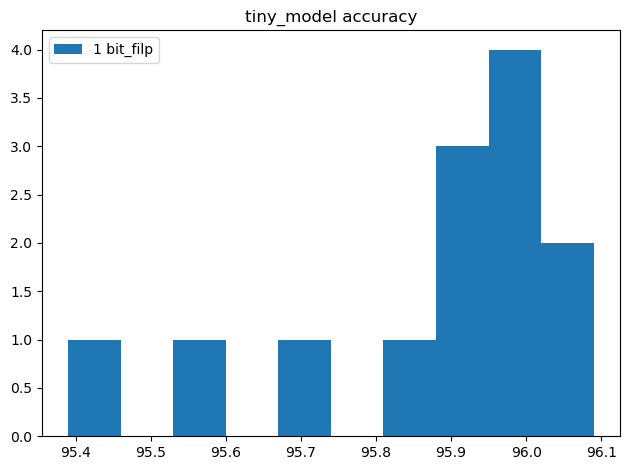

[95.84, 95.97, 95.65, 96.04, 95.82, 95.48, 95.8, 95.96, 95.22, 94.06, 95.42, 95.05, 95.08]
variance 0.27625917159763275


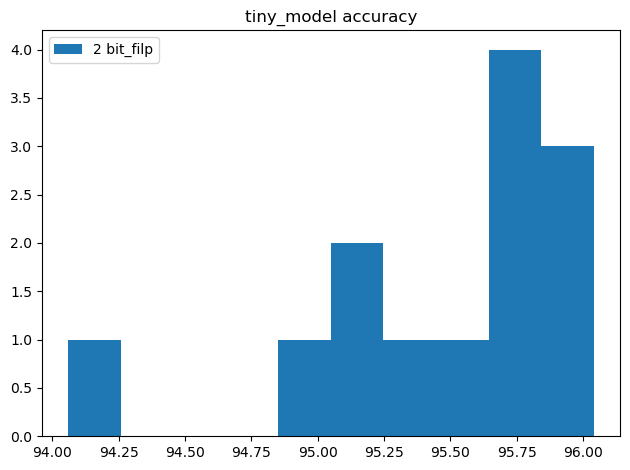

[95.61, 95.71, 95.26, 95.93, 95.64, 95.08, 95.47, 95.65, 94.81, 92.17, 94.77, 93.8, 94.57]
variance 0.9668686390532557


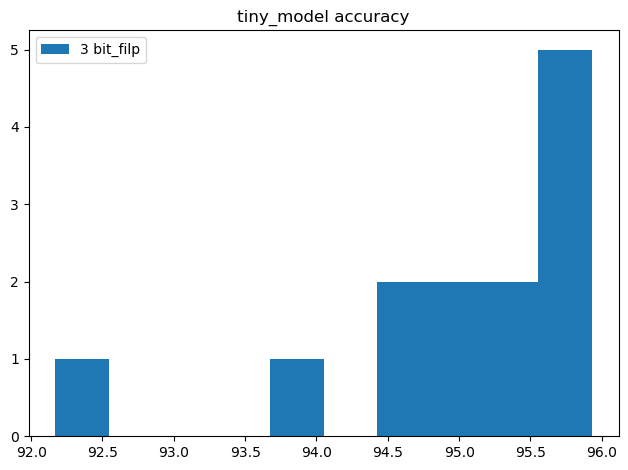

[94.95, 94.73, 94.43, 95.79, 95.19, 95.03, 94.46, 95.07, 94.34, 88.46, 94.29, 91.9, 94.33]
variance 3.3842863905325493


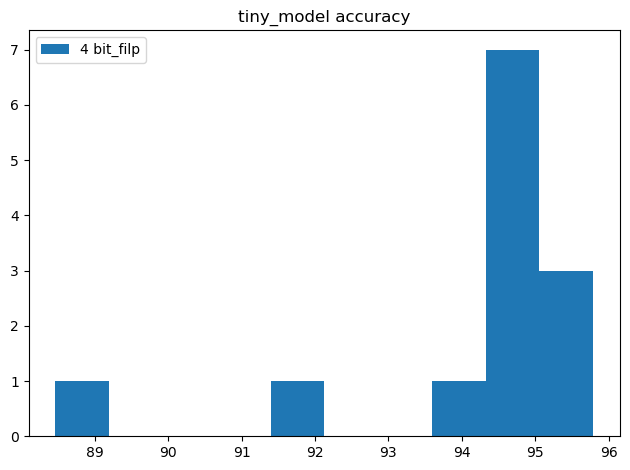

[94.45, 91.86, 92.09, 95.66, 95.09, 94.33, 93.66, 94.05, 93.41, 83.67, 93.67, 87.62, 93.64]
variance 10.262546745562123


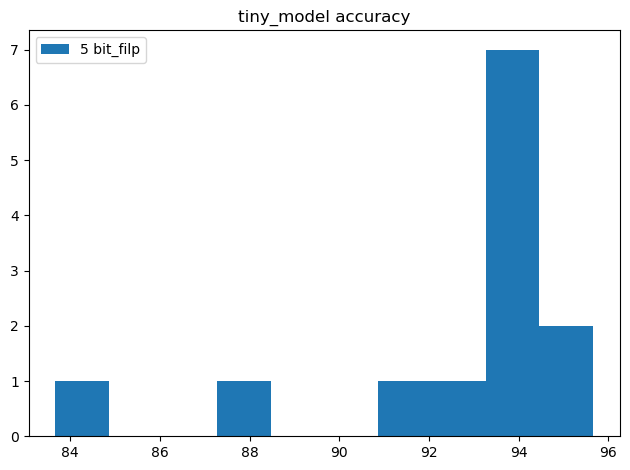

[92.74, 80.06, 86.02, 95.44, 94.76, 93.43, 92.19, 93.06, 92.61, 78.94, 91.56, 82.4, 92.26]
variance 30.245059171597635


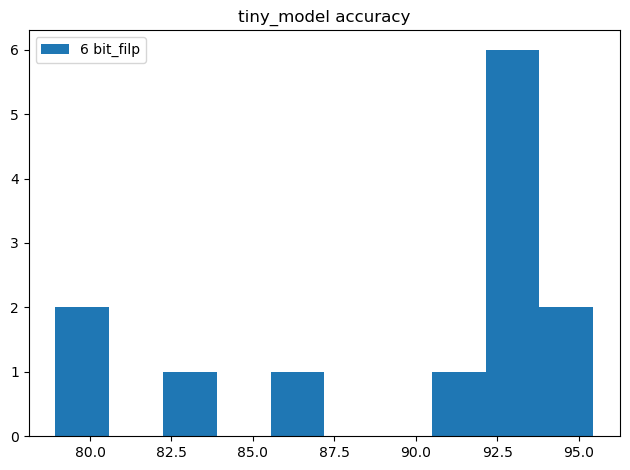

[89.61, 63.24, 77.39, 94.92, 93.72, 91.32, 91.18, 92.34, 91.07, 71.34, 87.19, 77.56, 90.39]
variance 89.90271005917157


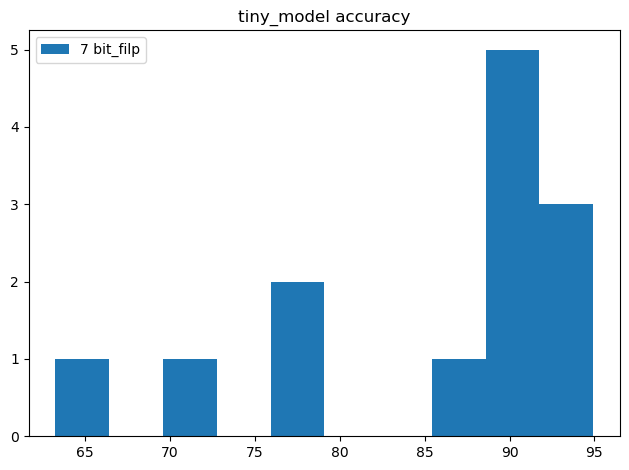

[80.29, 47.69, 65.22, 94.51, 92.44, 82.32, 89.62, 91.48, 90.06, 62.17, 79.31, 68.75, 88.51]
variance 190.12095976331364


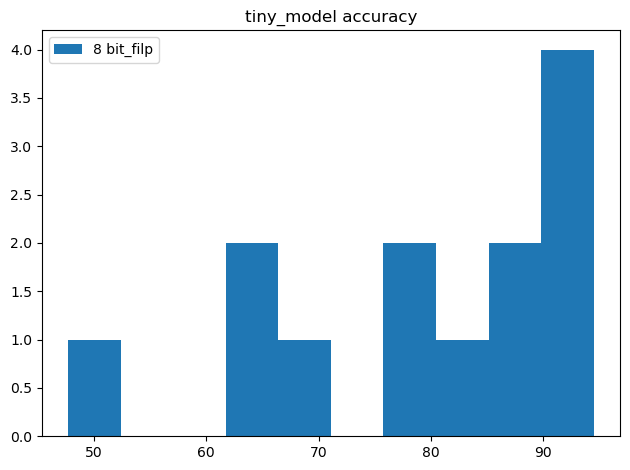

[72.82, 33.4, 51.03, 94.14, 91.21, 69.02, 86.11, 89.46, 88.19, 53.17, 69.34, 61.6, 84.47]
variance 321.919125443787


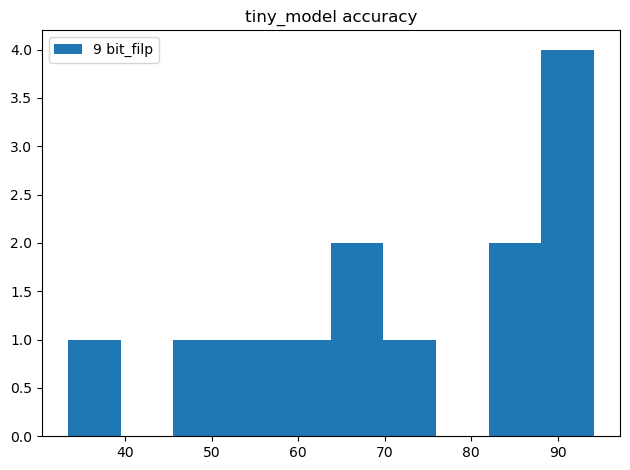

[62.67, 26.58, 42.63, 93.59, 88.14, 49.23, 82.26, 85.7, 85.09, 46.68, 52.39, 53.82, 76.84]
variance 421.02087928994104


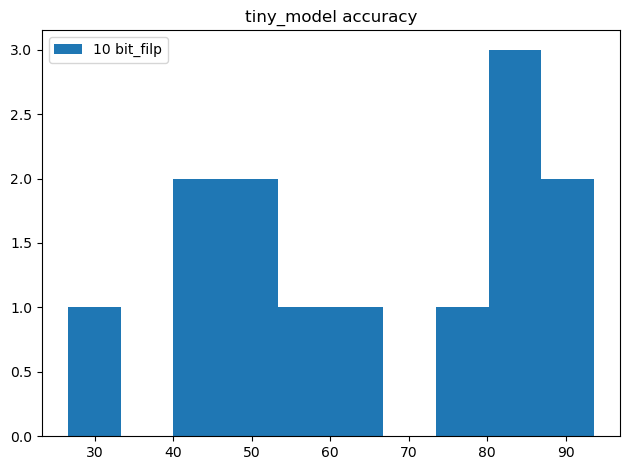

[54.85, 17.15, 30.23, 92.69, 82.73, 35.22, 75.66, 78.43, 81.47, 41.09, 41.9, 45.44, 61.84]
variance 520.2666982248521


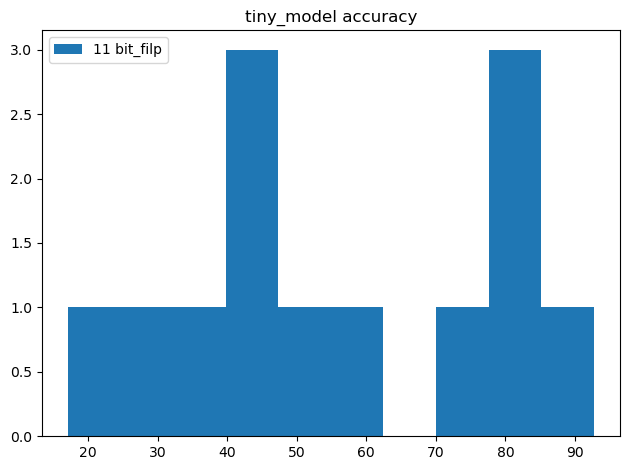

[38.71, 13.81, 24.77, 84.02, 77.49, 24.62, 68.18, 70.72, 74.98, 33.49, 33.56, 36.24, 51.34]
variance 517.2029846153847


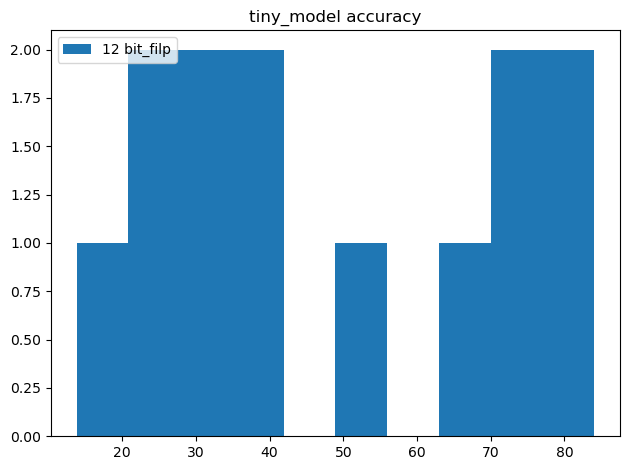

[27.23, 12.63, 19.0, 73.43, 71.36, 18.81, 62.38, 60.84, 71.78, 30.53, 27.81, 29.96, 42.8]
variance 471.7333289940829


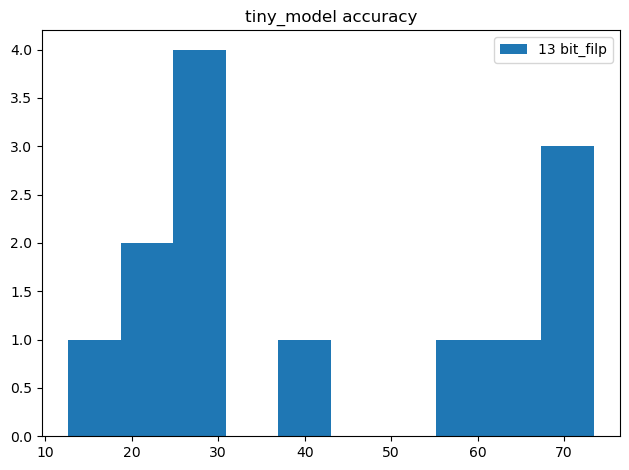

[17.88, 11.62, 19.05, 60.56, 63.54, 18.09, 56.17, 49.82, 65.49, 25.77, 18.78, 23.5, 33.39]
variance 378.67003905325447


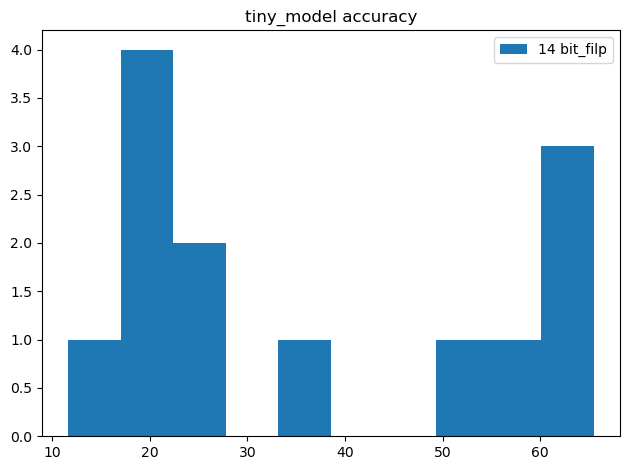

[13.01, 11.55, 18.23, 44.08, 55.9, 15.49, 46.85, 40.74, 55.91, 22.08, 14.8, 14.09, 23.44]
variance 268.6927159763314


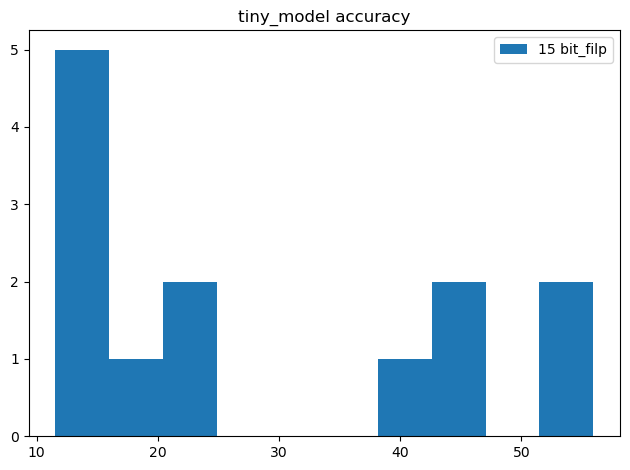

[11.7, 11.09, 16.23, 33.59, 48.88, 12.56, 38.86, 35.01, 46.16, 16.99, 12.67, 13.36, 17.84]
variance 183.1762852071006


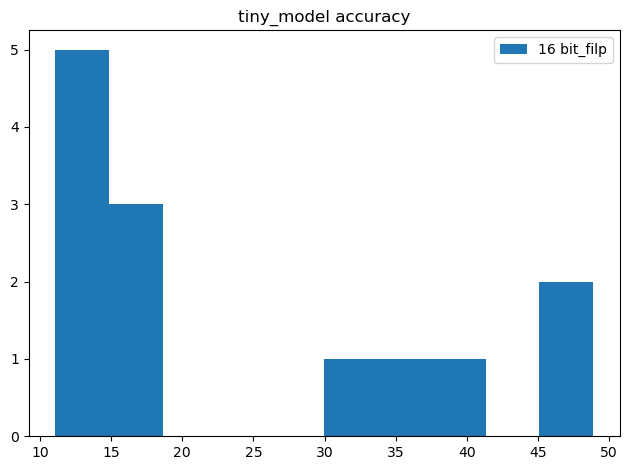

[10.72, 10.99, 14.96, 27.51, 38.83, 11.69, 33.45, 33.56, 30.86, 13.52, 11.96, 12.76, 14.02]
variance 103.72741301775149


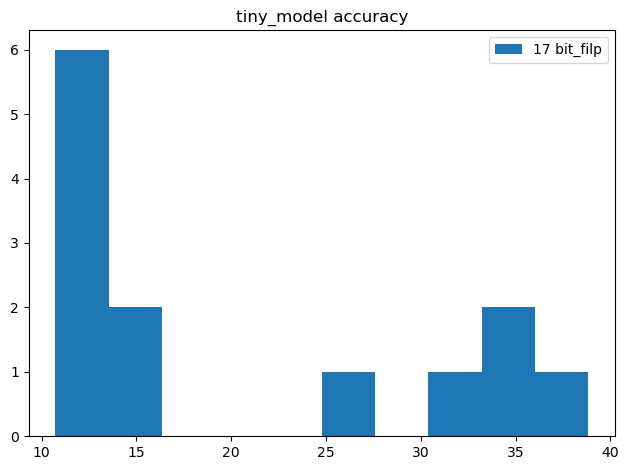

[10.58, 10.99, 14.46, 22.53, 26.91, 11.51, 21.7, 26.03, 23.2, 13.15, 11.72, 10.79, 11.66]
variance 37.846746745562136


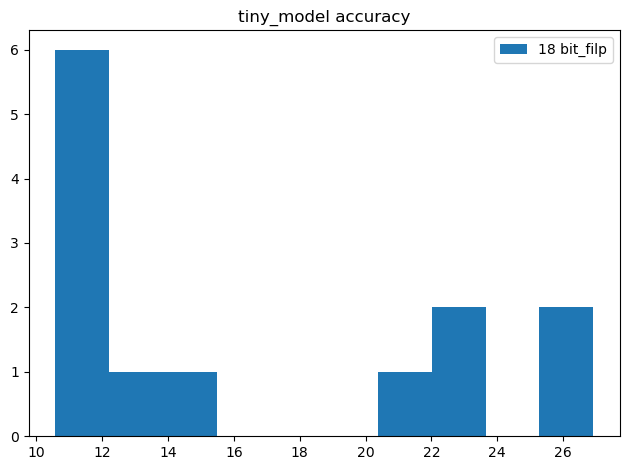

[10.49, 10.9, 13.74, 17.01, 17.41, 11.41, 18.87, 23.77, 16.92, 12.04, 11.58, 10.22, 10.48]
variance 16.372813017751476


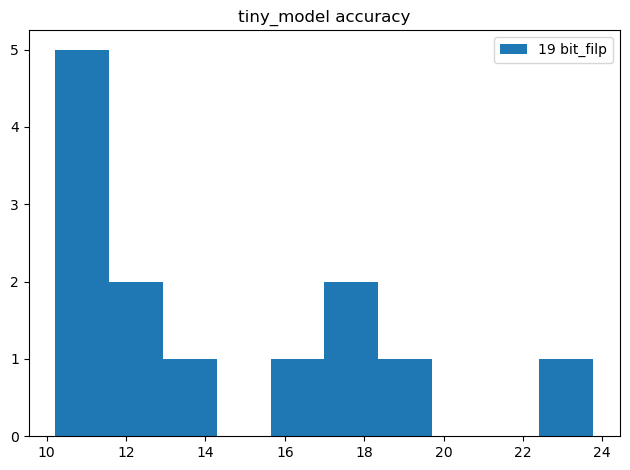

[10.45, 10.9, 13.58, 16.64, 14.12, 11.4, 15.28, 18.07, 15.16, 10.51, 11.48, 10.17, 10.47]
variance 6.673576331360947


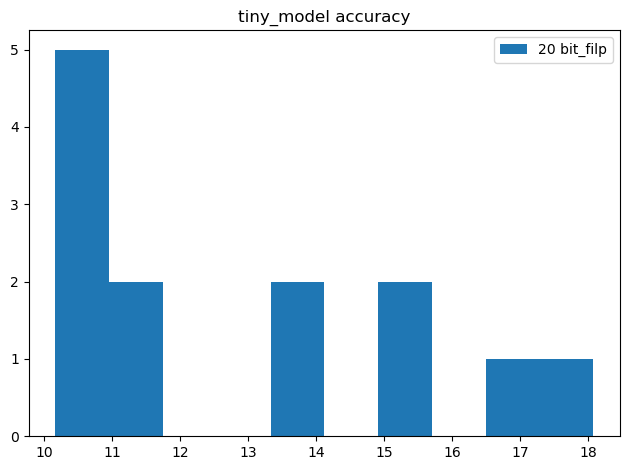

[10.36, 10.87, 13.4, 15.56, 12.0, 11.32, 14.75, 17.77, 14.12, 10.47, 11.32, 10.15, 10.29]
variance 5.417776331360947


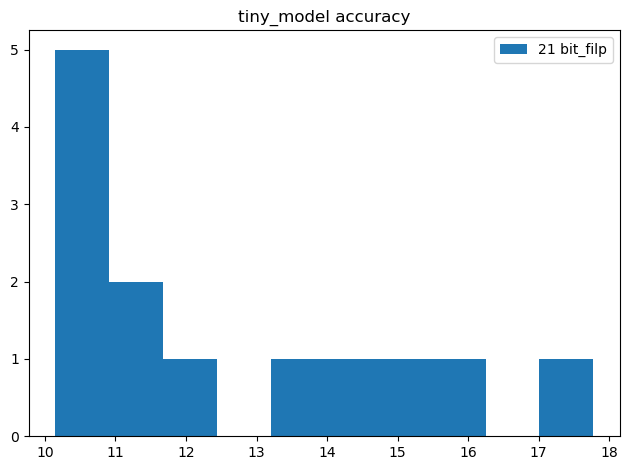

[10.33, 10.82, 13.19, 13.94, 11.68, 11.29, 13.0, 15.12, 12.03, 10.41, 11.14, 10.07, 10.24]
variance 2.3242686390532534


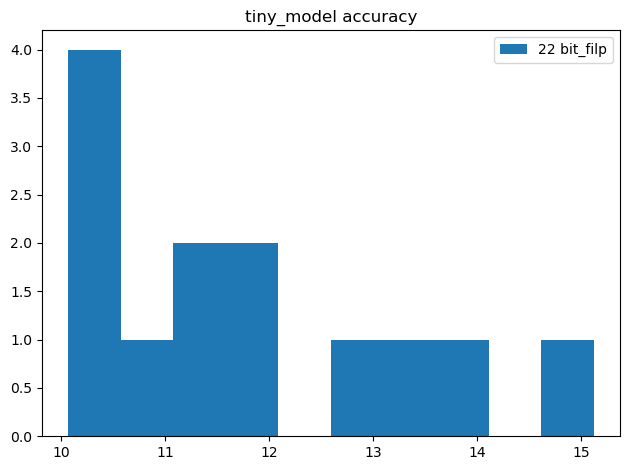

[10.2, 10.34, 13.06, 13.68, 11.51, 11.24, 12.63, 12.02, 11.73, 10.39, 11.1, 10.06, 10.22]
variance 1.2968899408284023


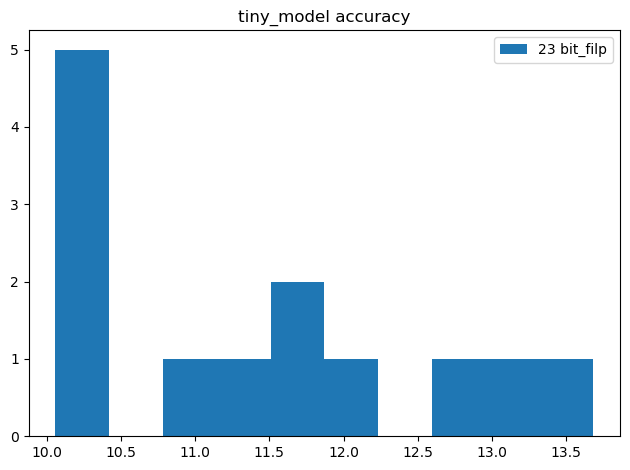

[10.18, 10.32, 12.8, 12.91, 10.9, 11.18, 12.46, 11.96, 11.46, 10.38, 10.35, 10.05, 10.19]
variance 1.0264094674556217


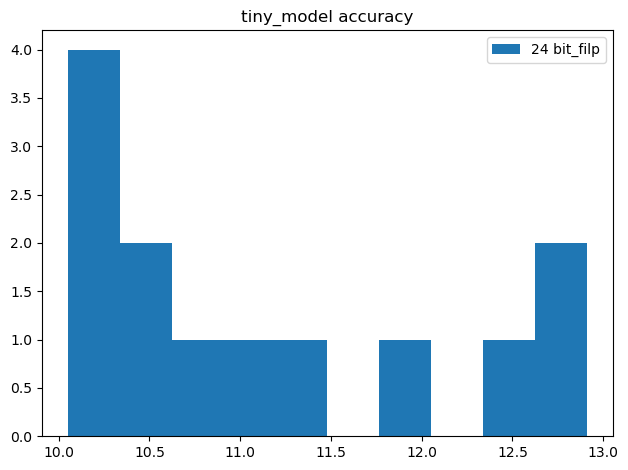

[10.15, 10.28, 12.17, 12.78, 10.78, 11.13, 12.38, 11.88, 11.27, 10.35, 10.34, 10.05, 10.18]
variance 0.8450828402366863


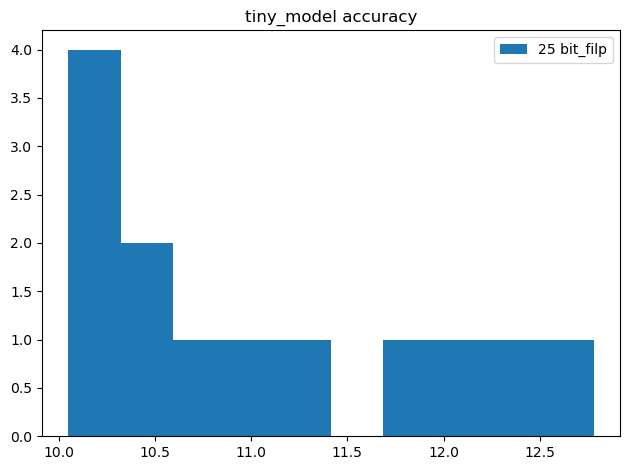

[10.05, 10.26, 12.12, 12.61, 10.77, 10.85, 11.38, 11.78, 11.09, 10.35, 10.34, 10.05, 10.18]
variance 0.6508153846153844


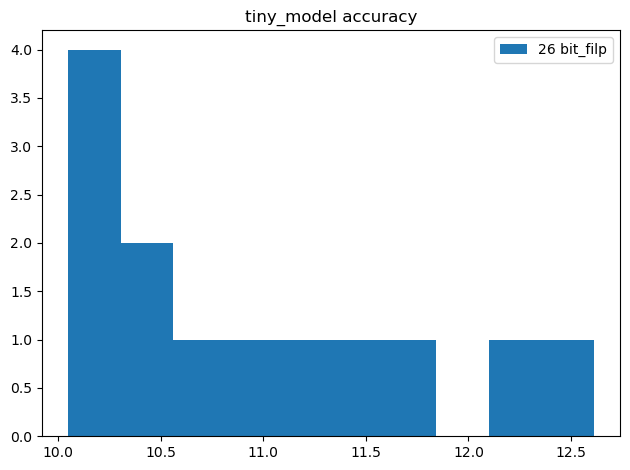

[10.05, 10.25, 11.99, 12.69, 10.69, 10.83, 11.29, 11.73, 10.95, 10.33, 10.33, 10.05, 10.16]
variance 0.6415100591715974


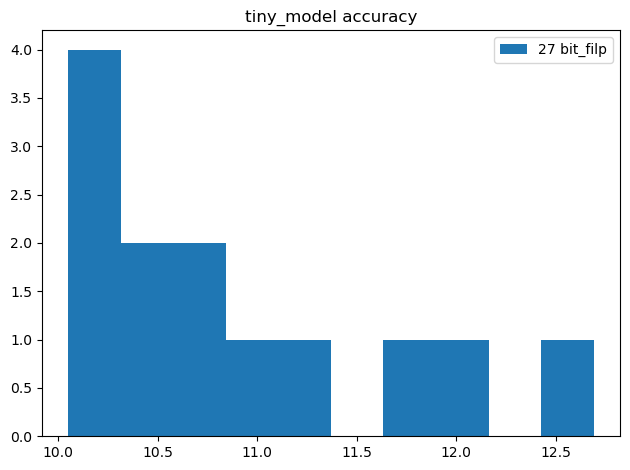

[10.05, 10.25, 11.89, 12.35, 10.69, 10.79, 11.24, 11.68, 10.44, 10.31, 10.23, 10.04, 10.16]
variance 0.5470437869822485


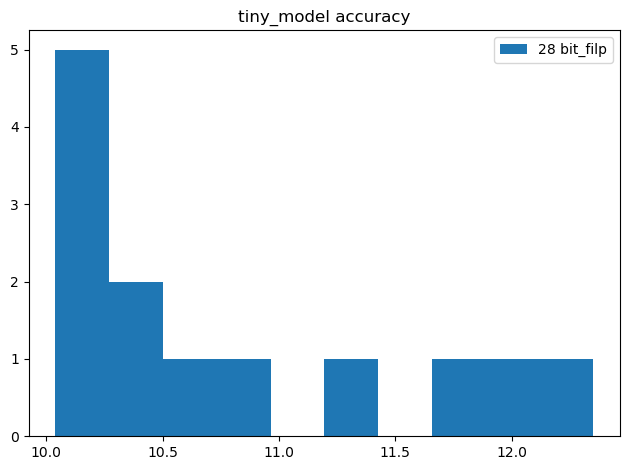

[10.05, 10.25, 11.02, 12.24, 10.66, 10.79, 11.17, 11.66, 10.26, 10.29, 10.22, 10.04, 10.16]
variance 0.42800236686390547


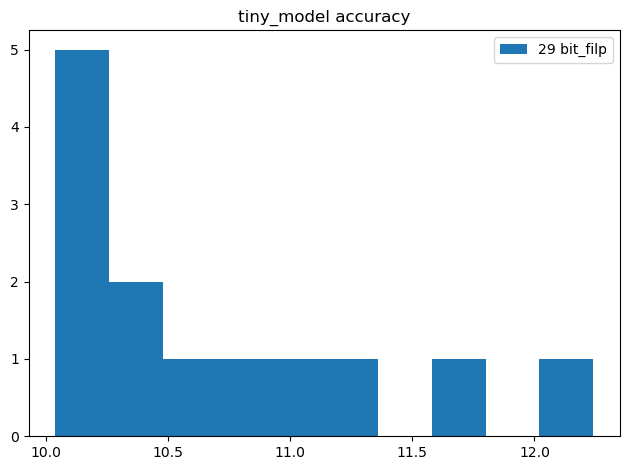

[10.05, 10.26, 10.99, 12.2, 10.59, 10.78, 11.12, 11.63, 10.23, 10.25, 10.22, 10.0, 10.15]
variance 0.4173668639053253


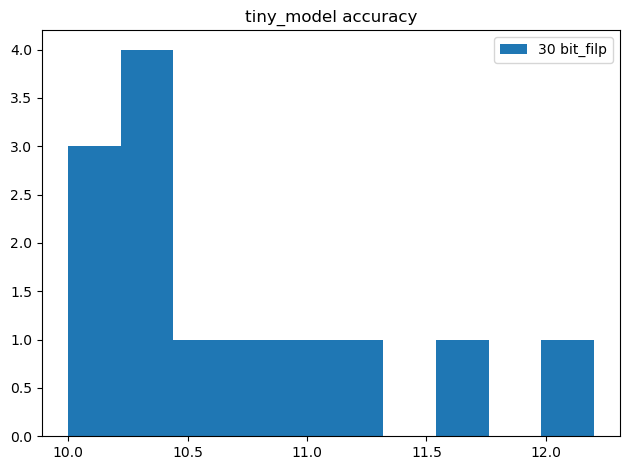

[10.01, 10.26, 10.99, 12.1, 10.53, 10.78, 10.64, 11.58, 10.14, 10.24, 10.22, 10.0, 10.15]
variance 0.37778698224852053


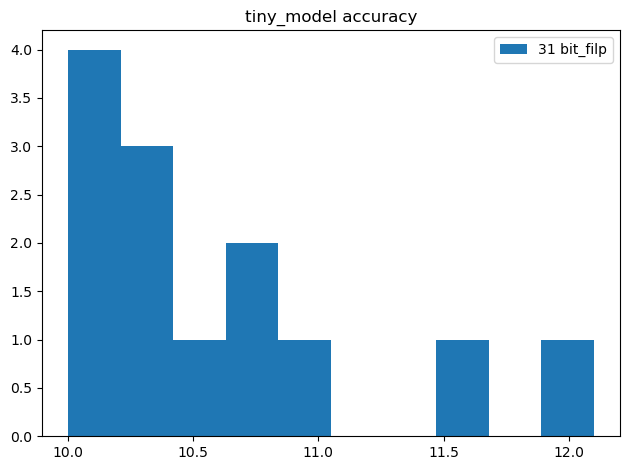

[10.01, 10.25, 10.98, 11.28, 10.5, 10.0, 10.62, 11.51, 10.13, 10.24, 10.0, 10.0, 10.14]
variance 0.24659408284023657


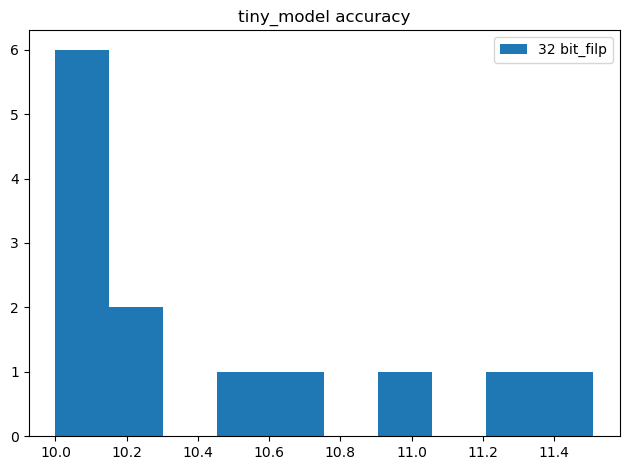

[10.01, 10.26, 10.98, 11.23, 10.1, 10.0, 10.57, 11.48, 10.12, 10.23, 10.0, 10.0, 10.05]
variance 0.24537514792899426


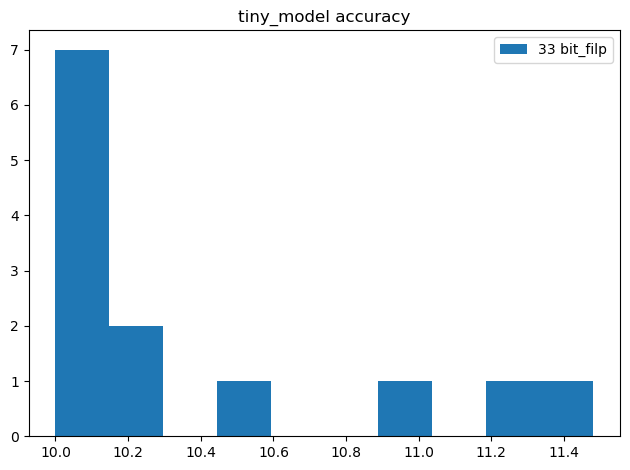

[10.01, 10.19, 10.83, 11.13, 10.09, 10.0, 10.32, 11.37, 10.08, 10.18, 10.0, 10.0, 10.05]
variance 0.203175147928994


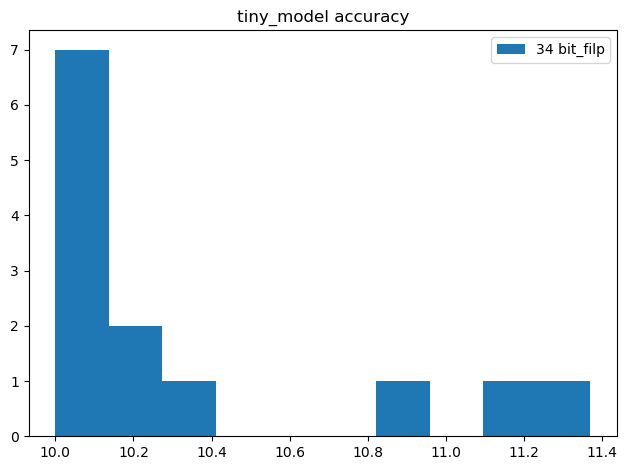

[10.0, 10.19, 10.84, 11.08, 10.02, 10.0, 10.27, 11.35, 10.08, 10.1, 10.0, 10.0, 10.03]
variance 0.20114792899408288


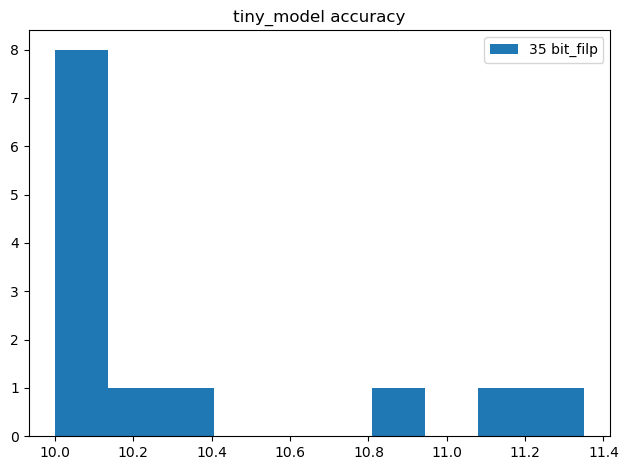

[10.0, 10.19, 10.83, 11.03, 10.02, 10.0, 10.27, 11.35, 10.01, 10.1, 10.0, 10.0, 10.03]
variance 0.19725562130177507


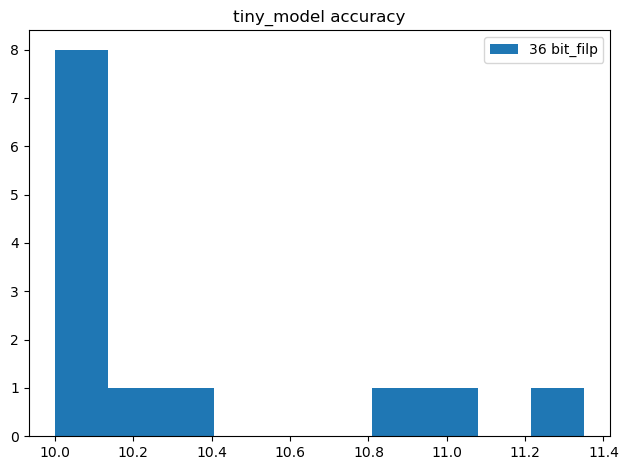

[10.0, 10.18, 10.76, 10.49, 10.02, 10.0, 10.26, 11.02, 10.0, 10.1, 10.0, 10.0, 10.03]
variance 0.10309230769230768


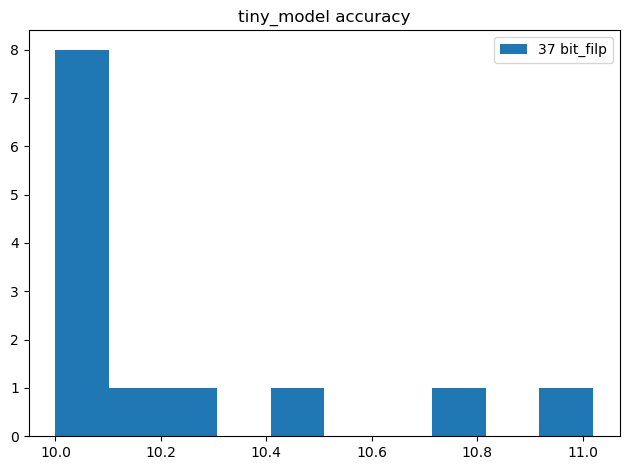

[10.0, 10.17, 10.76, 10.46, 10.02, 10.0, 10.26, 10.98, 10.0, 10.09, 10.0, 10.0, 10.02]
variance 0.09761775147929003


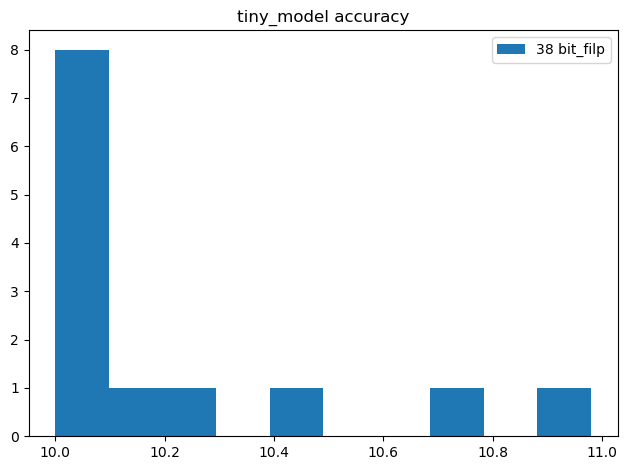

[10.0, 10.17, 10.58, 10.46, 10.02, 10.0, 10.24, 10.97, 10.0, 10.08, 10.0, 10.0, 10.02]
variance 0.08356331360946757


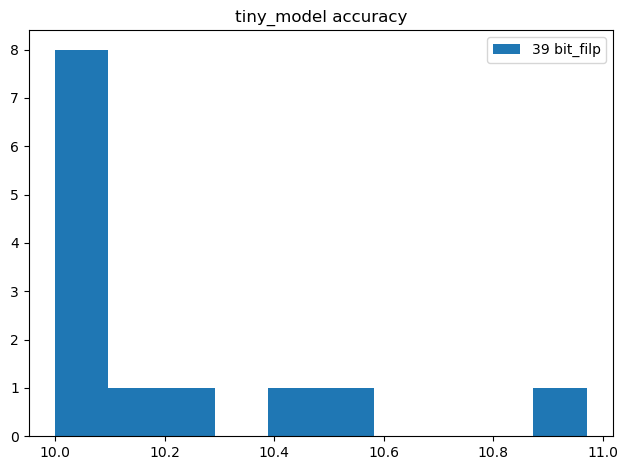

[10.0, 10.17, 10.58, 10.46, 10.02, 10.0, 10.26, 10.95, 10.0, 10.08, 10.0, 10.0, 10.02]
variance 0.08137869822485204


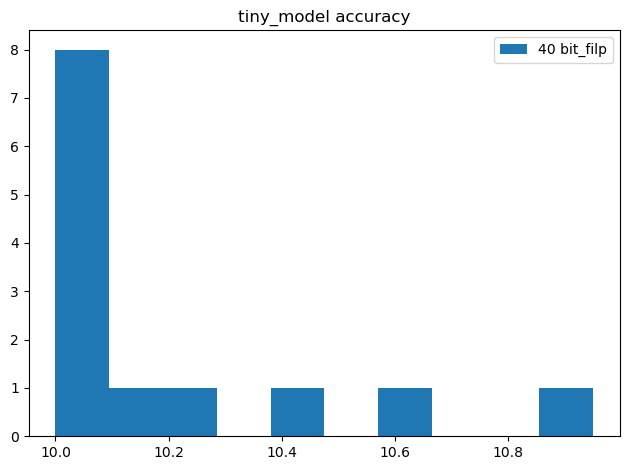

[10.0, 10.17, 10.57, 10.52, 10.0, 10.0, 10.19, 10.92, 10.0, 10.08, 10.0, 10.0, 10.02]
variance 0.08032307692307693


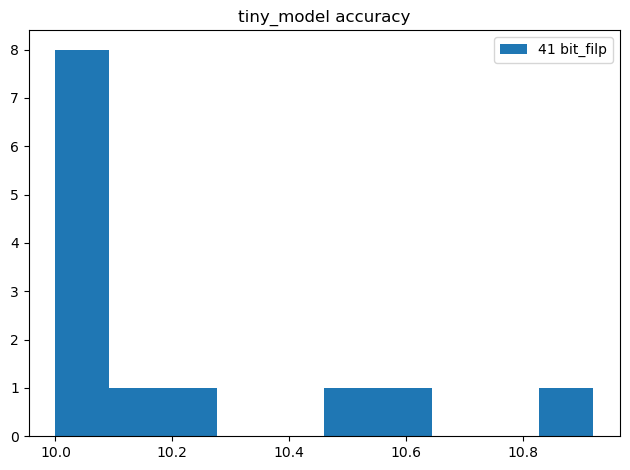

[10.0, 10.17, 10.55, 10.52, 10.0, 10.0, 10.09, 10.9, 10.0, 10.08, 10.0, 10.0, 10.02]
variance 0.07762248520710065


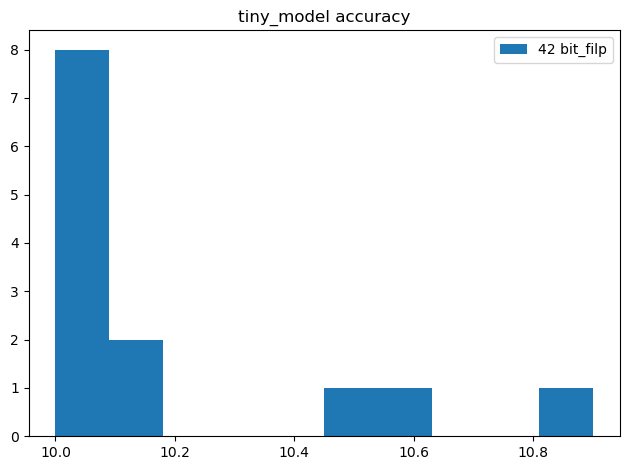

[10.0, 10.17, 10.54, 10.51, 10.0, 10.0, 10.04, 10.91, 10.0, 10.08, 10.0, 10.0, 10.01]
variance 0.07876213017751477


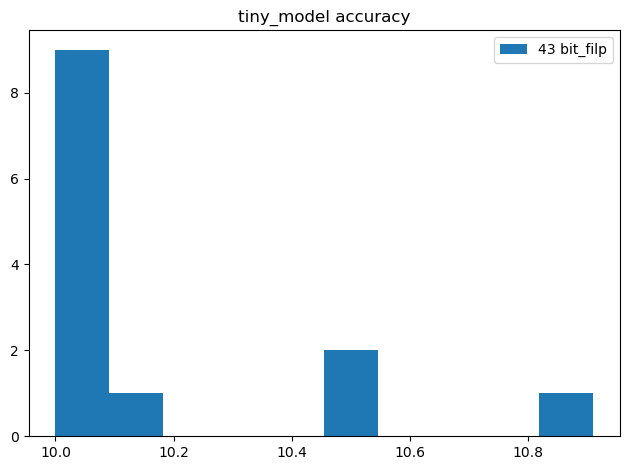

[10.0, 10.18, 10.54, 10.51, 10.0, 10.0, 10.04, 10.8, 10.0, 10.08, 10.0, 10.0, 10.02]
variance 0.06694437869822491


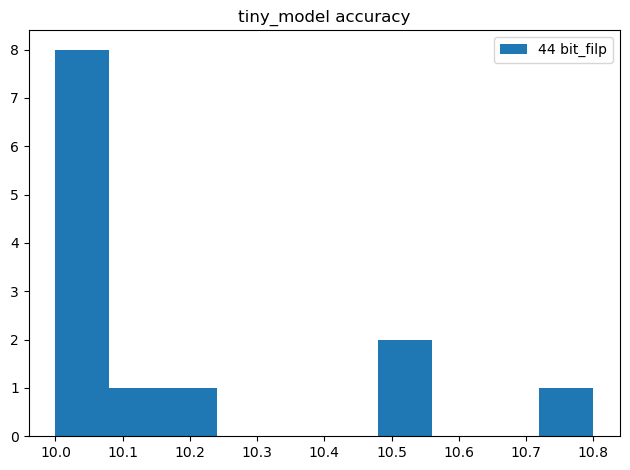

[10.0, 10.17, 10.25, 10.51, 10.0, 10.0, 10.0, 10.7, 10.0, 10.07, 10.0, 10.0, 10.02]
variance 0.04763313609467447


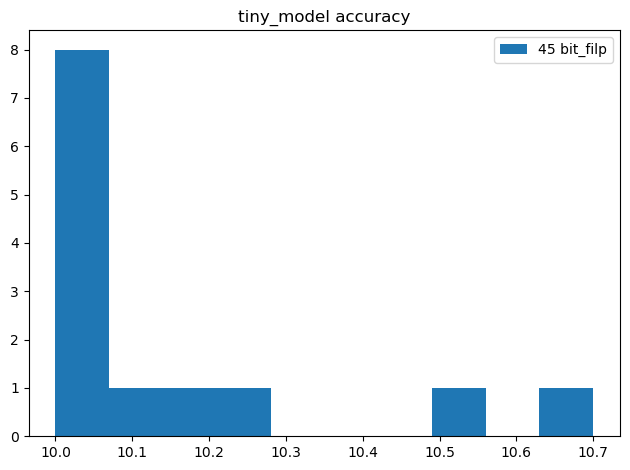

[10.0, 10.17, 10.25, 10.17, 10.0, 10.0, 10.0, 10.7, 10.0, 10.07, 10.0, 10.0, 10.02]
variance 0.036085207100591654


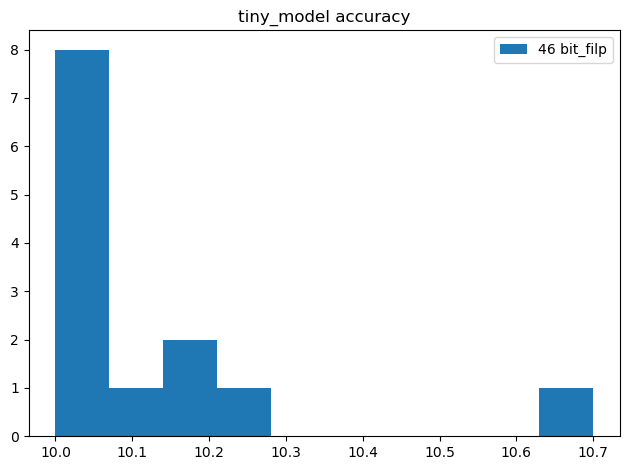

[10.0, 10.17, 10.25, 10.25, 10.0, 10.0, 10.0, 10.65, 10.0, 10.07, 10.0, 10.0, 10.01]
variance 0.033125443786982275


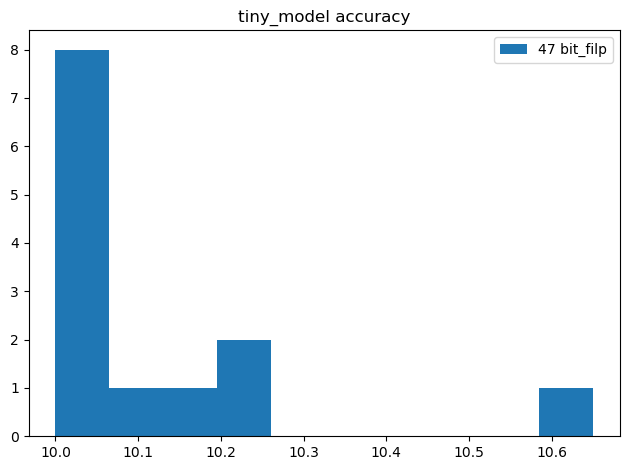

[10.0, 10.17, 10.25, 10.25, 10.0, 10.0, 10.0, 10.65, 10.0, 10.07, 10.0, 10.0, 10.01]
variance 0.033125443786982275


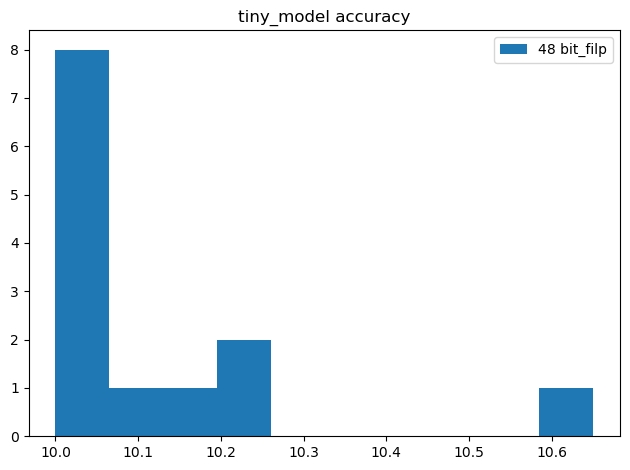

[10.0, 10.17, 10.25, 10.25, 10.0, 10.0, 10.0, 10.64, 10.0, 10.07, 10.0, 10.0, 10.01]
variance 0.032298224852071046


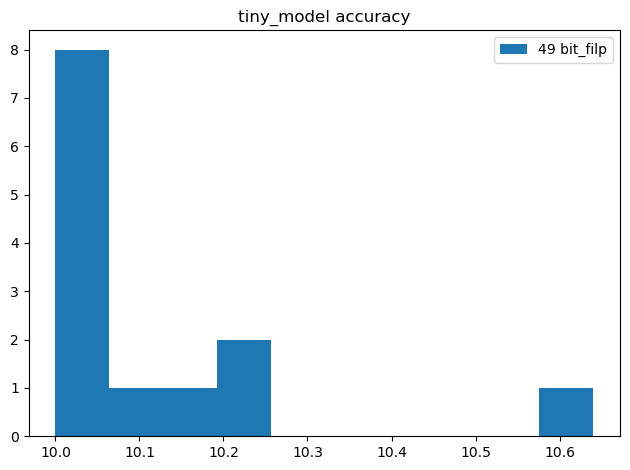

[10.0, 10.17, 10.24, 10.24, 10.0, 10.0, 10.0, 10.64, 10.0, 10.07, 10.0, 10.0, 10.01]
variance 0.03187100591715982


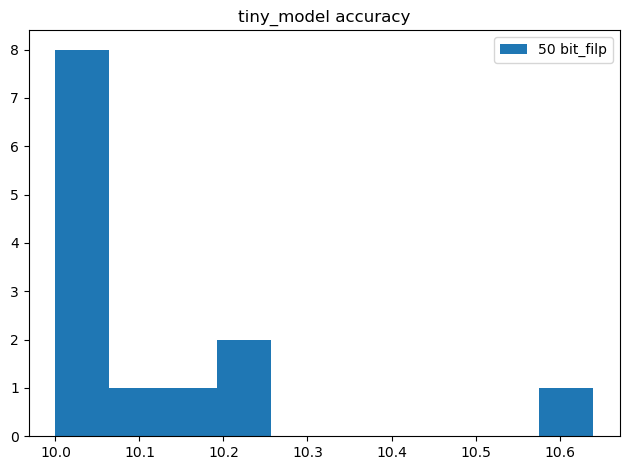

[10.0, 10.17, 10.24, 10.24, 10.0, 10.0, 10.0, 10.64, 10.0, 10.07, 10.0, 10.0, 10.01]
variance 0.03187100591715982


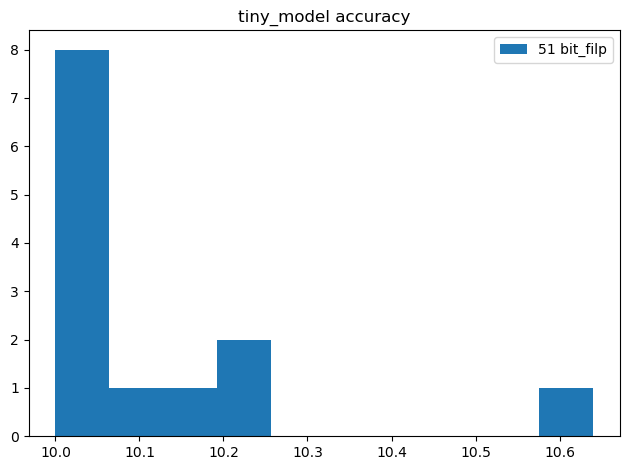

[10.0, 10.13, 10.24, 10.24, 10.0, 10.0, 10.0, 10.64, 10.0, 10.07, 10.0, 10.0, 10.01]
variance 0.03158698224852076


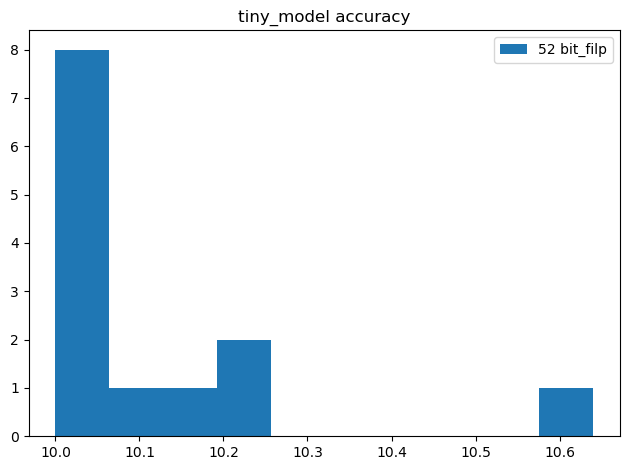

[10.0, 10.13, 10.24, 10.24, 10.0, 10.0, 10.0, 10.64, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.031800000000000064


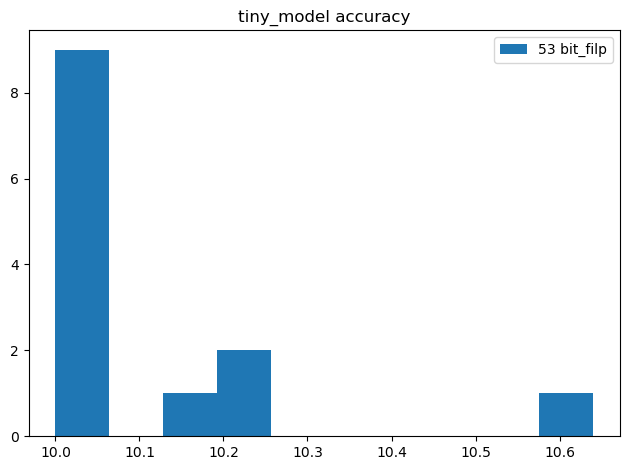

[10.0, 10.13, 10.23, 10.24, 10.0, 10.0, 10.0, 10.63, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.030766863905325535


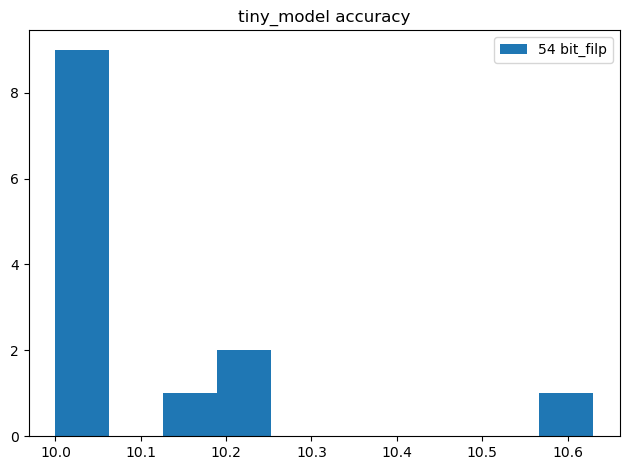

[10.0, 10.13, 10.21, 10.24, 10.0, 10.0, 10.0, 10.61, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.028778698224852066


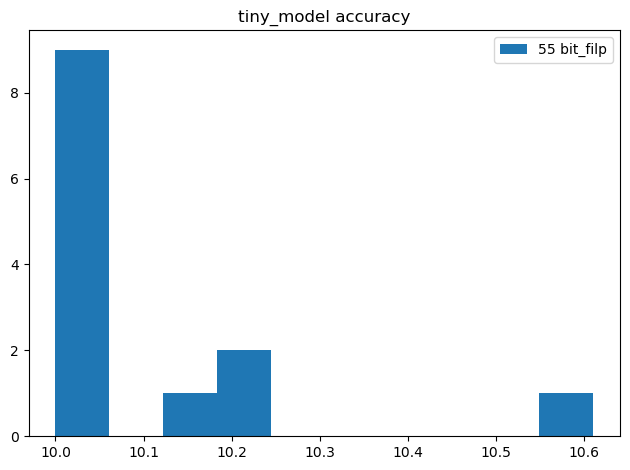

[10.0, 10.13, 10.21, 10.23, 10.0, 10.0, 10.0, 10.61, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.02856331360946744


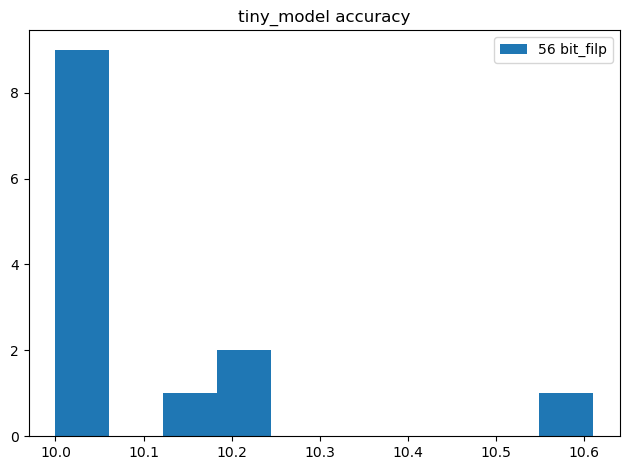

[10.0, 10.13, 10.21, 10.23, 10.0, 10.0, 10.0, 10.61, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.02856331360946744


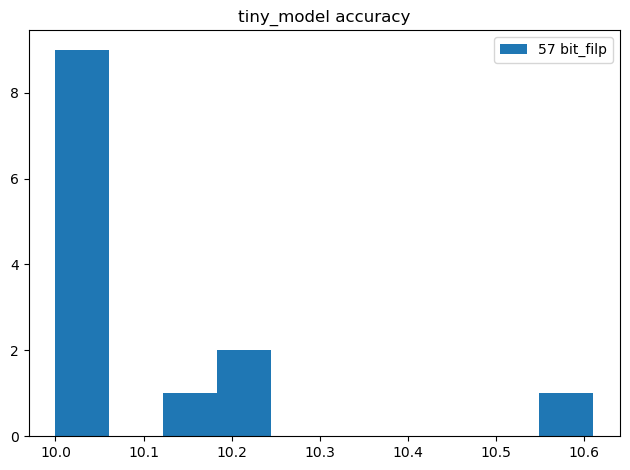

[10.0, 10.12, 10.21, 10.19, 10.0, 10.0, 10.0, 10.61, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.02779171597633133


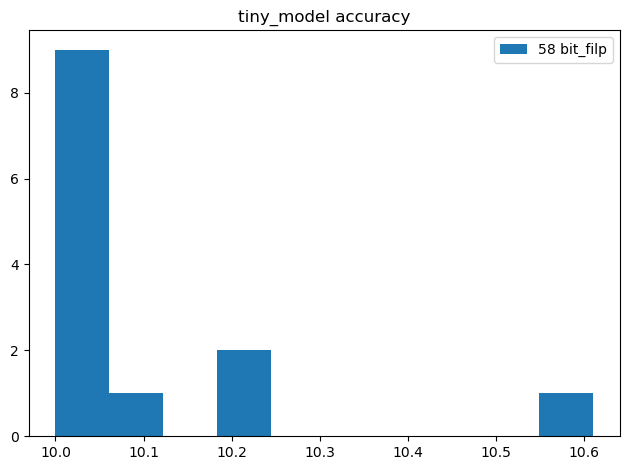

[10.0, 10.12, 10.21, 10.18, 10.0, 10.0, 10.0, 10.57, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.024559763313609505


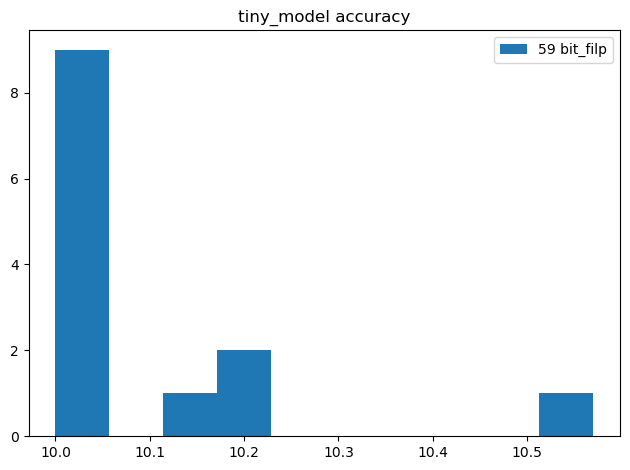

[10.0, 10.12, 10.21, 10.18, 10.0, 10.0, 10.0, 10.57, 10.0, 10.04, 10.0, 10.0, 10.01]
variance 0.024559763313609505


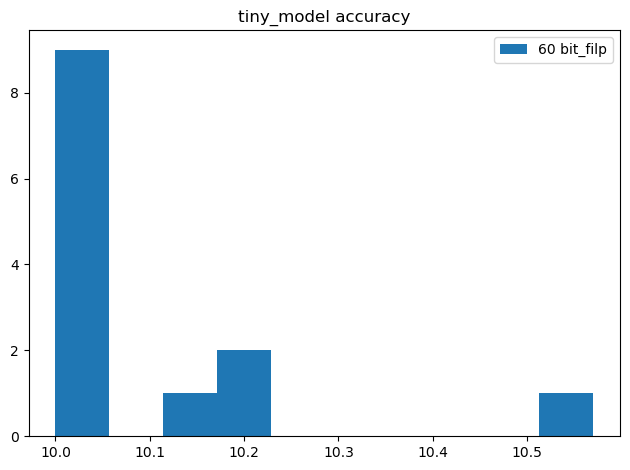

In [39]:
for i in range(len(data_tiny_distrib)):
    plt.hist(list(map(float,data_tiny_distrib.iloc[i])),label=str(i)+" bit_filp")
    print(list(map(float,data_tiny_distrib.iloc[i])))
    print("variance",np.var(list(map(float,data_tiny_distrib.iloc[i]))))
    # print(data_tiny_distrib.iloc[i])
    plt.legend()
    plt.title("tiny_model accuracy")
    plt.tight_layout()
    plt.show()
